# Telecom Churn Prediction

<b>Sections in this notebook:
    1. Data Scrubbing/Cleaning: Columns Renaming & Missing Values Treatment
    2. Exploratory Data Analysis: Correlation, Univariate & Bivariate Analysis using Visualizations
    3. Pre Model Building Steps: Feature Enginerring and Multicollinearity Check
    4. Model Building: Logistic Regression
    5. Model Building: Random Forests- Deriving feature importances and building RF Model using Grid Search CV
    6. Model Building: SVM's- Standardizing Data and then running SVM with Grid Search CV for params tuning
    7. Model Building: XGBoost using Random Search CV for parameter tuning
    8. Model Comparisons/Evaluation using Classification Report and ROC-AUC Curve

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv(r'Telco_Churn_Data.csv')
data.head().round(2)

Target Churn  Target Code  Current Bill Amt  Avg Calls  Avg Calls Weekdays  \
0     No Churn            0             14210   17950.00            30297.00   
1        Churn            1             14407       0.00                0.00   
2        Churn            1             12712     204.67            10393.67   
3     No Churn            0             13807   15490.33            41256.33   
4     No Churn            0              3805    5075.00            12333.33   

   Account Age  Percent Increase MOM Acct Plan Subtype   Complaint Code  \
0           24                 -0.33              Gold  Billing Problem   
1           28                  0.00            Silver           Moving   
2           23                  0.00              Gold  Billing Problem   
3           39                  0.15            Silver  Billing Problem   
4           23                 -0.69              Gold  Billing Problem   

   Avg Days Delinquent  Current TechSupComplaints  \
0                  6.2                          0   
1                  1.0                          0   
2                 17.6                          0   
3                  0.0                          0   
4                  3.8                          0   

   Current Days OpenWorkOrders  Equipment Age  Condition of Current Handset  \
0                          0.0              8                           1.0   
1                          0.0             17                           1.0   
2                          0.0             23                           1.0   
3                          0.0             17                           1.0   
4                          0.0             10                           1.0   

   Avg Hours WorkOrderOpenned  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

# Section 1:  DATA Scrubbing/Cleaning - Renaming Columns and missing values treatment

In [3]:
data.shape

(4708, 15)

In [4]:
data.info()

#some columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
Target Churn                    4708 non-null object
Target Code                     4708 non-null int64
Current Bill Amt                4708 non-null int64
Avg Calls                       4708 non-null float64
Avg Calls Weekdays              4708 non-null float64
Account Age                     4708 non-null int64
Percent Increase MOM            4708 non-null float64
Acct Plan Subtype               4708 non-null object
Complaint Code                  4701 non-null object
Avg Days Delinquent             4708 non-null float64
Current TechSupComplaints       4708 non-null int64
Current Days OpenWorkOrders     4708 non-null float64
Equipment Age                   4708 non-null int64
Condition of Current Handset    4264 non-null float64
Avg Hours WorkOrderOpenned      4708 non-null float64
dtypes: float64(7), int64(5), object(3)
memory usage: 551.8+ KB


# Column renaming 

In [5]:
data.columns=data.columns.str.replace(' ','_')
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpenned'],
      dtype='object')

In [6]:
data.describe().round(2)

#There is 49% churn as mean of Target=0.49

Target_Code  Current_Bill_Amt  Avg_Calls  Avg_Calls_Weekdays  \
count      4708.00           4708.00    4708.00             4708.00   
mean          0.49          19828.82    9269.69            38127.99   
std           0.50          17204.51   10437.34            39172.24   
min           0.00           -690.00       0.00                0.00   
25%           0.00          12288.00    2602.25            13031.25   
50%           0.00          15254.00    6396.33            26765.83   
75%           1.00          22799.00   12250.50            50061.42   
max           1.00         325127.00  181786.00           374457.67   

       Account_Age  Percent_Increase_MOM  Avg_Days_Delinquent  \
count      4708.00               4708.00              4708.00   
mean         26.08                 -0.01                13.97   
std           7.15                  4.48                10.79   
min          15.00                 -1.00                 0.00   
25%          20.00                 -0.57                 6.00   
50%          25.00                 -0.19                12.40   
75%          32.00                  0.12                19.30   
max          40.00                210.10               126.00   

       Current_TechSupComplaints  Current_Days_OpenWorkOrders  Equipment_Age  \
count                    4708.00                      4708.00        4708.00   
mean                        0.41                         2.44          10.81   
std                         0.95                        20.20           8.71   
min                         0.00                         0.00           0.00   
25%                         0.00                         0.00           4.00   
50%                         0.00                         0.00           9.00   
75%                         0.00                         0.00          17.00   
max                        11.00                       368.00          39.00   

       Condition_of_Current_Handset  Avg_Hours_WorkOrderOpenned  
count                       4264.00                     4708.00  
mean                           1.02                        0.94  
std                            0.14                        8.93  
min                            1.00                        0.00  
25%                            1.00                        0.00  
50%                            1.00                        0.00  
75%                            1.00                        0.00  
max                            3.00                      297.50

In [7]:
data.describe(include='object')
#most of customers are silver category
#Billing problem is the most freq complaint

Target_Churn Acct_Plan_Subtype   Complaint_Code
count          4708              4708             4701
unique            2                 2                6
top        No Churn            Silver  Billing Problem
freq           2421              3914             2908

# Missing Values treatmnent

In [8]:
data.count()

Target_Churn                    4708
Target_Code                     4708
Current_Bill_Amt                4708
Avg_Calls                       4708
Avg_Calls_Weekdays              4708
Account_Age                     4708
Percent_Increase_MOM            4708
Acct_Plan_Subtype               4708
Complaint_Code                  4701
Avg_Days_Delinquent             4708
Current_TechSupComplaints       4708
Current_Days_OpenWorkOrders     4708
Equipment_Age                   4708
Condition_of_Current_Handset    4264
Avg_Hours_WorkOrderOpenned      4708
dtype: int64

In [9]:
#Complaint_Code , Condition_of_Current_Handset 
(((data.isnull().sum())/len(data))*100).round(2) # % of missing

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpenned      0.00
dtype: float64

In [10]:
#this is an ordinal variable with 3 being best condition and 1 being lowest condition. 
#Replacing nan with NA
data['Condition_of_Current_Handset'].fillna("NA",inplace=True)
data.Condition_of_Current_Handset.value_counts(dropna=False)

1.0    4186
NA      444
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [11]:
#Since Equipment age and Condition of hanset seem related checking Equipment age where Condition is NA

data.loc[data['Condition_of_Current_Handset']=='NA','Equipment_Age']

#so for where condition=NA equipment age=0 (or Nnot available)

4264    0
4265    0
4266    0
4267    0
4268    0
4269    0
4270    0
4271    0
4272    0
4273    0
4274    0
4275    0
4276    0
4277    0
4278    0
4279    0
4280    0
4281    0
4282    0
4283    0
4284    0
4285    0
4286    0
4287    0
4288    0
4289    0
4290    0
4291    0
4292    0
4293    0
       ..
4678    0
4679    0
4680    0
4681    0
4682    0
4683    0
4684    0
4685    0
4686    0
4687    0
4688    0
4689    0
4690    0
4691    0
4692    0
4693    0
4694    0
4695    0
4696    0
4697    0
4698    0
4699    0
4700    0
4701    0
4702    0
4703    0
4704    0
4705    0
4706    0
4707    0
Name: Equipment_Age, Length: 444, dtype: int64

In [12]:
#as Equipment age=0 (meaning not available) where condition_of_handset=NA, so we can't impute the missing values for both

#of these variables thus this is a case of MCAR/Missing compltely at Random and hence deleting observations

In [13]:
index_NA=data.loc[data['Condition_of_Current_Handset']=='NA'].index
index_NA

Int64Index([4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273,
            ...
            4698, 4699, 4700, 4701, 4702, 4703, 4704, 4705, 4706, 4707],
           dtype='int64', length=444)

In [14]:
data.drop(index=index_NA,inplace=True)

#filling nan values of Complaint_Code by its Mode value bcoz there are only7 missing values 
data['Complaint_Code']=data['Complaint_Code'].fillna(value='Billing Problem')

In [15]:
data.info()

#Our dataset now have no missing values for any variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4264 entries, 0 to 4263
Data columns (total 15 columns):
Target_Churn                    4264 non-null object
Target_Code                     4264 non-null int64
Current_Bill_Amt                4264 non-null int64
Avg_Calls                       4264 non-null float64
Avg_Calls_Weekdays              4264 non-null float64
Account_Age                     4264 non-null int64
Percent_Increase_MOM            4264 non-null float64
Acct_Plan_Subtype               4264 non-null object
Complaint_Code                  4264 non-null object
Avg_Days_Delinquent             4264 non-null float64
Current_TechSupComplaints       4264 non-null int64
Current_Days_OpenWorkOrders     4264 non-null float64
Equipment_Age                   4264 non-null int64
Condition_of_Current_Handset    4264 non-null object
Avg_Hours_WorkOrderOpenned      4264 non-null float64
dtypes: float64(6), int64(5), object(4)
memory usage: 533.0+ KB


# Section 2: Exploratory Data Analysis

In [16]:
summary_churn=data.groupby('Target_Churn').mean().round(2)
summary_churn

#major difference in means of churn and no churn observations for Percent_Increase_MOM, Avg_Days_Delinquent

#These 2 variables must be significant 

Target_Code  Current_Bill_Amt  Avg_Calls  Avg_Calls_Weekdays  \
Target_Churn                                                                 
Churn                 1.0          20191.74    9404.99            37840.80   
No Churn              0.0          19713.18    9374.02            39678.62   

              Account_Age  Percent_Increase_MOM  Avg_Days_Delinquent  \
Target_Churn                                                           
Churn               25.58                 -0.27                19.19   
No Churn            27.06                  0.28                 9.13   

              Current_TechSupComplaints  Current_Days_OpenWorkOrders  \
Target_Churn                                                           
Churn                              0.46                         2.73   
No Churn                           0.38                         2.65   

              Equipment_Age  Avg_Hours_WorkOrderOpenned  
Target_Churn                                             
Churn                 12.25                        0.93  
No Churn              11.64                        0.93

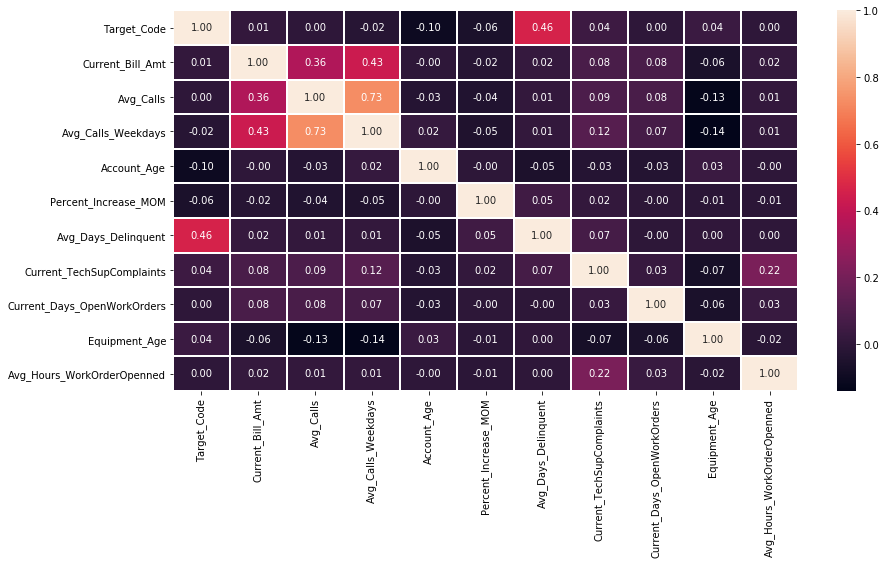

In [17]:
corr=data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True,linecolor='white',linewidths=1,fmt=".2f")

#Churn seem to be correlated with Avg_Days_deliquent- which is obvious

#Seemingly no multicollinearity: no high correlated variables except Avg_calls & Avg_calls_weekdays have 0.73 which is obvious

# Univariate Anaysis

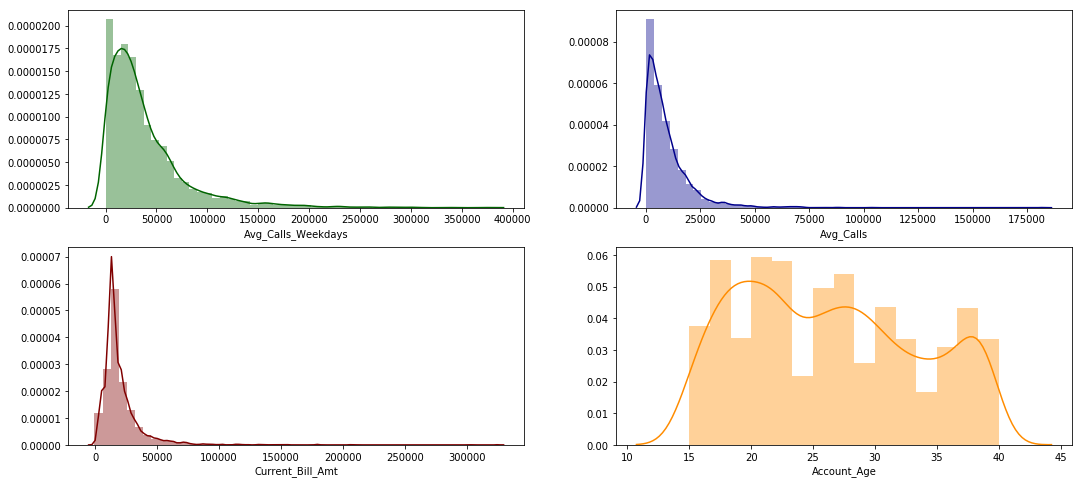

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(18, 8))

sns.distplot(data.Avg_Calls_Weekdays, kde=True,  color="darkgreen", ax=axes[0,0])



sns.distplot(data.Avg_Calls, kde=True,color="darkblue", ax=axes[0,1])



sns.distplot(data.Current_Bill_Amt, kde=True, color="maroon", ax=axes[1,0])


sns.distplot(data.Account_Age, kde=True, color="darkorange", ax=axes[1,1],bins=15)


#Avg calls & Avg call weekdays distribution makes sense as there are are always customers with 
#high calls consumption hence positively skewed

#Curr bill amount is normally distributed and Account Age is spread out which is fine(some new & some old customers)

# Bivariate

In [20]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(data.loc[data['Target_Churn']=='No Churn','Avg_Days_Delinquent'],color=sns.color_palette("Set2")[0],shade=True,label='No Churn')
ax=sns.kdeplot(data.loc[data['Target_Churn']=='Churn','Avg_Days_Delinquent'],color=sns.color_palette("Set2")[1],shade=True,label='Churn')
ax.set_title('Avg_Days_Delinquent distribution-Churn vs No-Churn')
ax.set(xlabel='Avg_Days_Delinquent')

#This graph shows that if somebody is delinquent for 16-17 days or more then its very likely that churn will happen

[Text(0.5, 0, 'Avg_Days_Delinquent')]

Text(0.5, 1.0, 'Current_Bill_Amt distribution-Churn vs No-Churn')

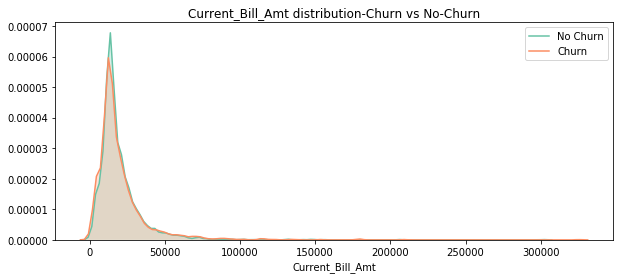

In [21]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(data.loc[data['Target_Churn']=='No Churn','Current_Bill_Amt'],color=sns.color_palette("Set2")[0],shade=True,label='No Churn')
ax=sns.kdeplot(data.loc[data['Target_Churn']=='Churn','Current_Bill_Amt'],color=sns.color_palette("Set2")[1],shade=True,label='Churn')
ax.set(xlabel='Current_Bill_Amt')
ax.set_title('Current_Bill_Amt distribution-Churn vs No-Churn')

In [23]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(data.loc[data['Target_Churn']=='No Churn','Avg_Calls'],color=sns.color_palette("Set2")[0],shade=True,label='No Churn')
ax=sns.kdeplot(data.loc[data['Target_Churn']=='Churn','Avg_Calls'],color=sns.color_palette("Set2")[1],shade=True,label='Churn')
ax.set_title('Avg_Calls distribution-Churn vs No-Churn')
ax.set(xlabel='Avg_Calls')


[Text(0.5, 0, 'Avg_Calls')]

[Text(0.5, 0, 'Avg_Calls_Weekdays')]

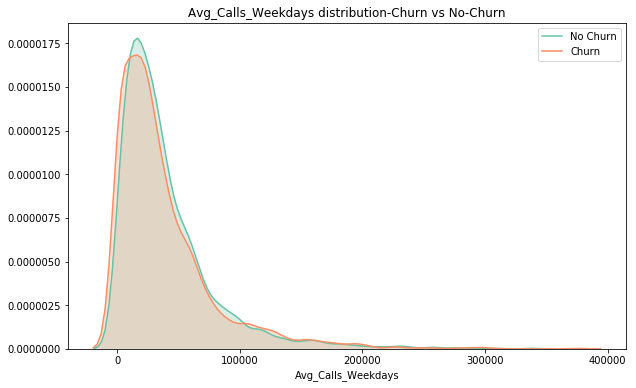

In [24]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(data.loc[data['Target_Churn']=='No Churn','Avg_Calls_Weekdays'],color=sns.color_palette("Set2")[0],shade=True,label='No Churn')
ax=sns.kdeplot(data.loc[data['Target_Churn']=='Churn','Avg_Calls_Weekdays'],color=sns.color_palette("Set2")[1],shade=True,label='Churn')
ax.set_title('Avg_Calls_Weekdays distribution-Churn vs No-Churn')
ax.set(xlabel='Avg_Calls_Weekdays')

[Text(0.5, 0, 'Account_Age')]

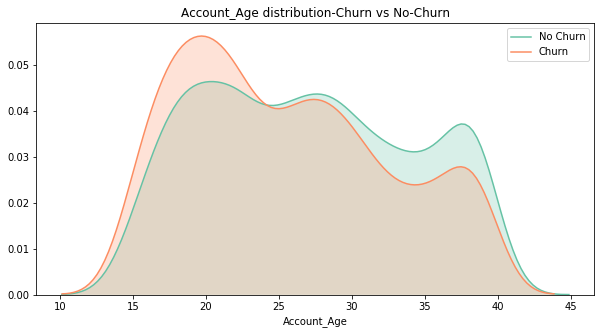

In [22]:
plt.figure(figsize=(10,5))
ax=sns.kdeplot(data.loc[data['Target_Churn']=='No Churn','Account_Age'],color=sns.color_palette("Set2")[0],shade=True,label='No Churn')
ax=sns.kdeplot(data.loc[data['Target_Churn']=='Churn','Account_Age'],color=sns.color_palette("Set2")[1],shade=True,label='Churn')
ax.set_title('Account_Age distribution-Churn vs No-Churn')
ax.set(xlabel='Account_Age')

In [26]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(data.loc[data['Target_Churn']=='No Churn','Equipment_Age'],color=sns.color_palette("Set2")[0],shade=True,label='No Churn')
ax=sns.kdeplot(data.loc[data['Target_Churn']=='Churn','Equipment_Age'],color=sns.color_palette("Set2")[1],shade=True,label='Churn')
ax.set_title('Equipment_Age distribution-Churn vs No-Churn')
ax.set(xlabel='Equipment_Age')

[Text(0.5, 0, 'Equipment_Age')]

In [27]:
data['Percent_Increase_MOM'].min()

-1.0

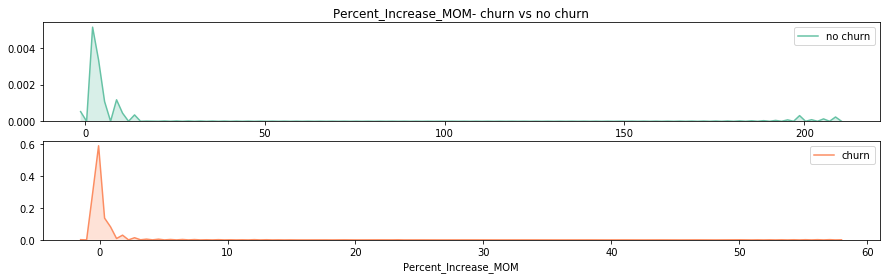

In [28]:
f, ax=plt.subplots(nrows=2,figsize=(15,4))
ax[0]=sns.kdeplot(data.loc[(data['Target_Code'] == 0),'Percent_Increase_MOM'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn',ax=ax[0])
ax[0].set_title('Percent_Increase_MOM- churn vs no churn')
ax[1]=sns.kdeplot(data.loc[(data['Target_Code'] == 1),'Percent_Increase_MOM'] , color=sns.color_palette("Set2")[1],shade=True, label='churn',ax=ax[1])
ax[1].set(xlabel='Percent_Increase_MOM')
plt.show()

#Monthly percently increase or growth is a strong independent variable as most of the churn cases have negative or very
#low monthly percent growth

#To counter churn low monthly growth customers needs to be targeted

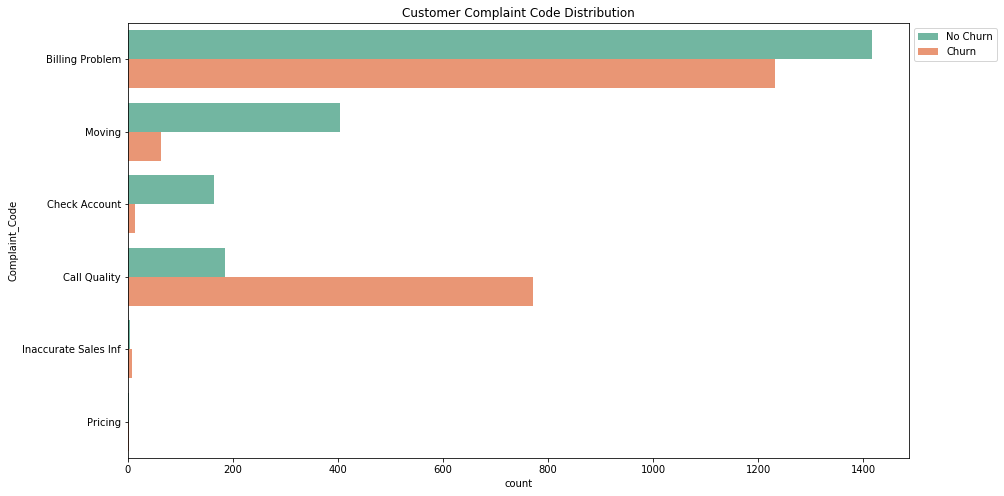

In [25]:
plt.figure(figsize=(14,8))
p=sns.countplot(y=data['Complaint_Code'],data=data,hue= 'Target_Churn',palette='Set2')
p.set_title('Customer Complaint Code Distribution')
p.legend(bbox_to_anchor=(1,1), loc="upper left")

#Call quality complaints appear to be causing high amount of churn as majority of the customers with this
# complaint leave the telecom operator

#and Billing Problem also is a major factor causing churn and high number of customers report it & leave


<b> Churn cases as % of not churned by type of complaint

In [30]:
data_Churn=data[data['Target_Churn']=='Churn']
X1=(data_Churn.groupby('Complaint_Code')['Complaint_Code'].count())
data_No_Churn=data[data['Target_Churn']=='No Churn']
Y1=data_No_Churn.groupby('Complaint_Code')['Complaint_Code'].count()
#type(X1)=series
print(X1/Y1)

print('----------------------------------------')
print(data.groupby(['Complaint_Code','Target_Churn'])['Target_Churn'].count())

#Call quality is a major problem, Telcom operator needs to address it
#Billing problem in absolute terms causing highest churn
#other compalints not very problematic

Complaint_Code
Billing Problem         0.870056
Call Quality            4.195652
Check Account           0.085890
Inaccurate Sales Inf    1.400000
Moving                  0.155941
Pricing                 1.000000
Name: Complaint_Code, dtype: float64
----------------------------------------
Complaint_Code        Target_Churn
Billing Problem       Churn           1232
                      No Churn        1416
Call Quality          Churn            772
                      No Churn         184
Check Account         Churn             14
                      No Churn         163
Inaccurate Sales Inf  Churn              7
                      No Churn           5
Moving                Churn             63
                      No Churn         404
Pricing               Churn              2
                      No Churn           2
Name: Target_Churn, dtype: int64


Text(0.5, 1.0, 'Customer Acct_Plan_Subtype Distribution')

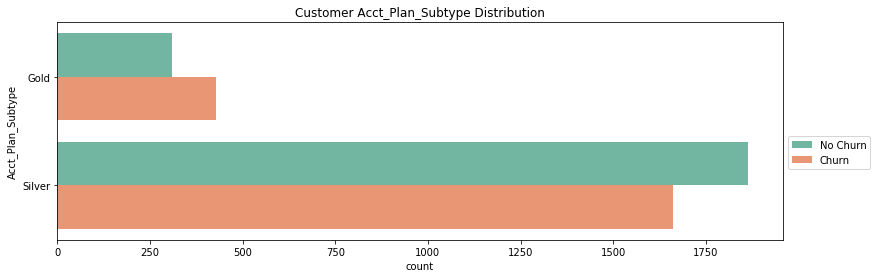

In [31]:
plt.figure(figsize=(13,4))
p=sns.countplot(y=data['Acct_Plan_Subtype'],hue='Target_Churn',data=data, palette='Set2')
p.legend(bbox_to_anchor=(1,0.5), loc="upper left")
p.set_title('Customer Acct_Plan_Subtype Distribution')
 

In [32]:
#Premium or Gold customers have churned more in relative terms than Silver ones, may be Gold service terms is a problem like it oculd be expensive or Gold customers
#have billing problem or call quality is a problem for Gold customers. Lets see what data says

Gold=data[data['Acct_Plan_Subtype']=='Gold']
Gold.groupby(['Complaint_Code','Target_Churn'])['Target_Churn'].count()

#As we can see majority of the Gold customers who churned did so due to call quality and billing issues.
#Also Gold customers can't tolerate call quality problems

Complaint_Code        Target_Churn
Billing Problem       Churn           244
                      No Churn        203
Call Quality          Churn           159
                      No Churn         35
Check Account         Churn             3
                      No Churn         25
Inaccurate Sales Inf  Churn             2
Moving                Churn            20
                      No Churn         45
Pricing               Churn             1
                      No Churn          2
Name: Target_Churn, dtype: int64

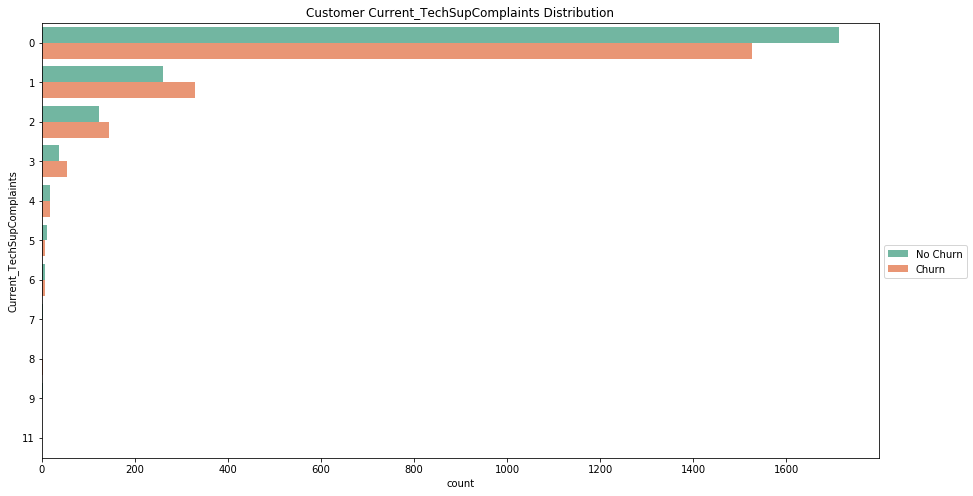

In [33]:
plt.figure(figsize=(15,8))
p=sns.countplot(y=data["Current_TechSupComplaints"], hue='Target_Churn', data=data,palette="Set2")
p.set_title('Customer Current_TechSupComplaints Distribution')
p.legend(bbox_to_anchor=(1,0.5),loc="upper left")

#As is abovious with increasing tech complaints churn increases

# Section 3: Pre Model Building Steps

# Feature Engineering: Hot encoding of categorical features 

In [34]:
data_hot_encoded=data.copy()
data_hot_encoded=pd.get_dummies(data_hot_encoded,columns=["Complaint_Code","Acct_Plan_Subtype"],prefix=["Complaint_Code","Acct_Plan_Subtype"])

In [35]:
data_hot_encoded.info() # this shows we have some object columns we need to convert them into categorical vars

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4264 entries, 0 to 4263
Data columns (total 21 columns):
Target_Churn                           4264 non-null object
Target_Code                            4264 non-null int64
Current_Bill_Amt                       4264 non-null int64
Avg_Calls                              4264 non-null float64
Avg_Calls_Weekdays                     4264 non-null float64
Account_Age                            4264 non-null int64
Percent_Increase_MOM                   4264 non-null float64
Avg_Days_Delinquent                    4264 non-null float64
Current_TechSupComplaints              4264 non-null int64
Current_Days_OpenWorkOrders            4264 non-null float64
Equipment_Age                          4264 non-null int64
Condition_of_Current_Handset           4264 non-null object
Avg_Hours_WorkOrderOpenned             4264 non-null float64
Complaint_Code_Billing Problem         4264 non-null uint8
Complaint_Code_Call Quality            4264 non-null 

# Adjustments in some features and hot encoding

In [36]:
#Condition_of_Current_Handset is a categorical variable-1 being least good condition and 3 beingmost good condition
data_hot_encoded=pd.get_dummies(data_hot_encoded,columns=["Condition_of_Current_Handset"],prefix=["Condition_of_Current_Handset"])

In [37]:
data_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4264 entries, 0 to 4263
Data columns (total 23 columns):
Target_Churn                           4264 non-null object
Target_Code                            4264 non-null int64
Current_Bill_Amt                       4264 non-null int64
Avg_Calls                              4264 non-null float64
Avg_Calls_Weekdays                     4264 non-null float64
Account_Age                            4264 non-null int64
Percent_Increase_MOM                   4264 non-null float64
Avg_Days_Delinquent                    4264 non-null float64
Current_TechSupComplaints              4264 non-null int64
Current_Days_OpenWorkOrders            4264 non-null float64
Equipment_Age                          4264 non-null int64
Avg_Hours_WorkOrderOpenned             4264 non-null float64
Complaint_Code_Billing Problem         4264 non-null uint8
Complaint_Code_Call Quality            4264 non-null uint8
Complaint_Code_Check Account           4264 non-null u

In [38]:
#Dropping one dummy var for each of categorical var's
data_final=data_hot_encoded.drop(['Complaint_Code_Pricing','Acct_Plan_Subtype_Silver','Condition_of_Current_Handset_1.0'],axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4264 entries, 0 to 4263
Data columns (total 20 columns):
Target_Churn                           4264 non-null object
Target_Code                            4264 non-null int64
Current_Bill_Amt                       4264 non-null int64
Avg_Calls                              4264 non-null float64
Avg_Calls_Weekdays                     4264 non-null float64
Account_Age                            4264 non-null int64
Percent_Increase_MOM                   4264 non-null float64
Avg_Days_Delinquent                    4264 non-null float64
Current_TechSupComplaints              4264 non-null int64
Current_Days_OpenWorkOrders            4264 non-null float64
Equipment_Age                          4264 non-null int64
Avg_Hours_WorkOrderOpenned             4264 non-null float64
Complaint_Code_Billing Problem         4264 non-null uint8
Complaint_Code_Call Quality            4264 non-null uint8
Complaint_Code_Check Account           4264 non-null u

In [39]:
from sklearn.model_selection import train_test_split
X=data_final.drop(['Target_Code',"Target_Churn"],axis=1)
Y=data_final['Target_Code']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=123,stratify=Y)

# Multicollinearity Check before Model Building

In [41]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(X_df): #X_df = X_train normally, in this model X=X_final
    '''
     '''
    X_df = add_constant(X_df)
    vifs = pd.Series(
        [1 / (1. - OLS(X_df[col].values, 
                       X_df.loc[:, X_df.columns != col].values).fit().rsquared) 
         for col in X_df],
        index=X_df.columns,
        name='VIF'
    )
    return vifs

In [45]:
variance_inflation_factors(X)
#no prblem here, VIF for categorical var's can be ignored

const                                  1086.567883
Current_Bill_Amt                          1.262524
Avg_Calls                                 2.173623
Avg_Calls_Weekdays                        2.398649
Account_Age                               1.064040
Percent_Increase_MOM                      1.006593
Avg_Days_Delinquent                       1.243722
Current_TechSupComplaints                 1.075446
Current_Days_OpenWorkOrders               1.033851
Equipment_Age                             1.035960
Avg_Hours_WorkOrderOpenned                1.053084
Complaint_Code_Billing Problem          252.775788
Complaint_Code_Call Quality             187.670451
Complaint_Code_Check Account             43.568141
Complaint_Code_Inaccurate Sales Inf       4.011350
Complaint_Code_Moving                   105.404694
Acct_Plan_Subtype_Gold                    1.178742
Condition_of_Current_Handset_2.0          1.025946
Condition_of_Current_Handset_3.0          1.002644
Name: VIF, dtype: float64

# Model Building: Trying out Multiple Algoriths as principle as no free lunch applies

# Section 4: Logistic Regression

<b> As is often Linear model like Log. Regression isn't applicable in classification problems due to lack of Linear Relationship, so first & foremost checking if Log Odds of Indep. var's are lineraly related to Target varibale  

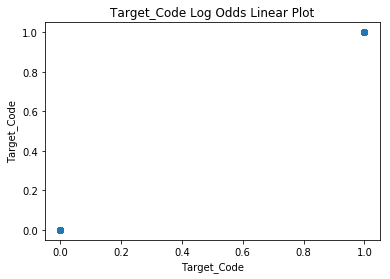

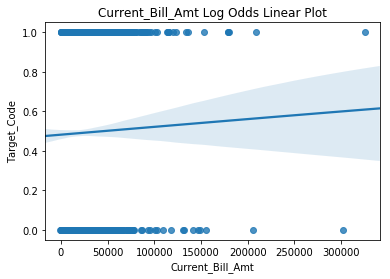

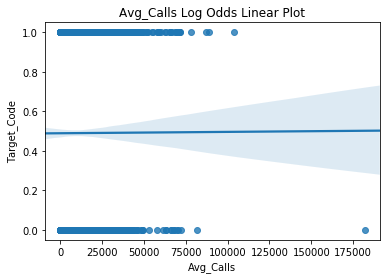

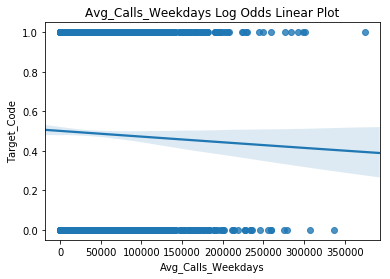

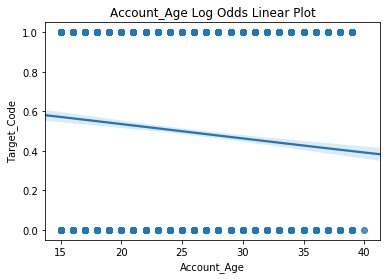

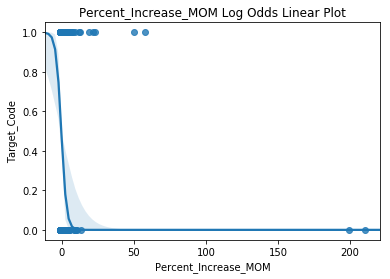

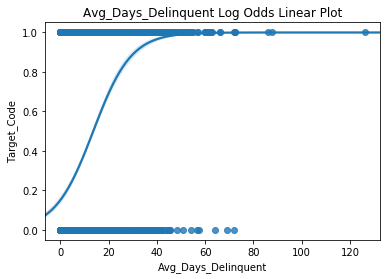

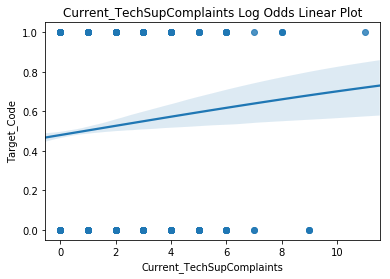

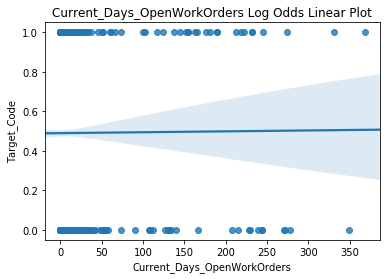

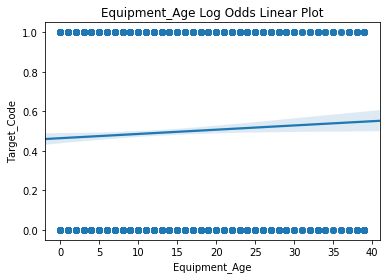

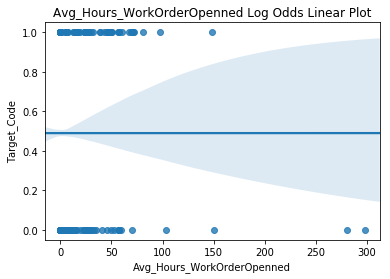

In [46]:
data_final_numeric=data_final.select_dtypes(include=['float64','int64',"int8"])

for i, col in enumerate (data_final_numeric.columns):
    plt.figure(i)
    sns.regplot(x=data_final_numeric[col],y=data_final_numeric['Target_Code'],data=data_final_numeric, logistic= True).set_title(col + " Log Odds Linear Plot")
    
    #As can be seen in below graphs most of the IV's don't exhibit S-shaped pattern with the DV, 
    #we can conclude that Log Odds of IV's are not linearly related DV hence a LINEAR MODEL/LOGISTIC REG. isn't applicable

# Section 5: Random Forests

# Feature Selection: Lets First Derive Feature Importances

<b> Adding a white/random noise column to discard features which have importance<white/random noise column

In [40]:
from random import gauss
from random import seed
from pandas import Series
seed(1)
# create white noise series
whitenoise_series = [gauss(0.0, 1.0) for i in range(X_train.shape[0])]
whitenoise_series = Series(whitenoise_series)

In [41]:
# summary stats
print(whitenoise_series.describe()) #mean~0 and std~1 all good

count    3198.000000
mean        0.009216
std         0.993907
min        -3.149965
25%        -0.655566
50%         0.005803
75%         0.687576
max         3.284978
dtype: float64


In [42]:
#restting index pf X_train so that it matches with series
X_train.reset_index(inplace=True,drop=False)
X_train['white_noise']=whitenoise_series

In [43]:
X_train.head()

index  Current_Bill_Amt     Avg_Calls  Avg_Calls_Weekdays  Account_Age  \
0   3303             16455  15328.666700        36123.000000           35   
1   3405              3347    562.333333         4579.000000           30   
2   4036             25625  41075.333300       137183.000000           20   
3    880             20996  11015.333300        24803.333300           34   
4    949              4520     40.000000          481.666667           33   

   Percent_Increase_MOM  Avg_Days_Delinquent  Current_TechSupComplaints  \
0             -0.207843                 18.5                          1   
1             -1.000000                 35.3                          1   
2             -0.913936                  8.5                          3   
3              0.363427                 16.0                          0   
4              0.625000                  5.3                          0   

   Current_Days_OpenWorkOrders  Equipment_Age  Avg_Hours_WorkOrderOpenned  \
0                          0.0             13                         0.0   
1                          0.0              4                         0.0   
2                          0.0             26                         0.0   
3                          0.0              3                         0.0   
4                          0.0             33                         0.0   

   Complaint_Code_Billing Problem  Complaint_Code_Call Quality  \
0                               0                            1   
1                               1                            0   
2                               1                            0   
3                               0                            1   
4                               0                            1   

   Complaint_Code_Check Account  Complaint_Code_Inaccurate Sales Inf  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   Complaint_Code_Moving  Acct_Plan_Subtype_Gold  \
0                      0                       0   
1                      0                       1   
2                      0                       0   
3                      0                       0   
4                      0                       1   

   Condition_of_Current_Handset_2.0  Condition_of_Current_Handset_3.0  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   white_noise  
0     1.288185  
1     1.449446  
2     0.066336  
3    -0.764544  
4    -1.092173

In [44]:
X_train.white_noise.isnull().any()

False

In [45]:
#resetting index of X_train back to orginal
X_train.set_index(keys=X_train['index'],inplace=True,drop=True)
X_train.drop(columns='index',inplace=True)
X_train.head()

Current_Bill_Amt     Avg_Calls  Avg_Calls_Weekdays  Account_Age  \
index                                                                    
3303              16455  15328.666700        36123.000000           35   
3405               3347    562.333333         4579.000000           30   
4036              25625  41075.333300       137183.000000           20   
880               20996  11015.333300        24803.333300           34   
949                4520     40.000000          481.666667           33   

       Percent_Increase_MOM  Avg_Days_Delinquent  Current_TechSupComplaints  \
index                                                                         
3303              -0.207843                 18.5                          1   
3405              -1.000000                 35.3                          1   
4036              -0.913936                  8.5                          3   
880                0.363427                 16.0                          0   
949                0.625000                  5.3                          0   

       Current_Days_OpenWorkOrders  Equipment_Age  Avg_Hours_WorkOrderOpenned  \
index                                                                           
3303                           0.0             13                         0.0   
3405                           0.0              4                         0.0   
4036                           0.0             26                         0.0   
880                            0.0              3                         0.0   
949                            0.0             33                         0.0   

       Complaint_Code_Billing Problem  Complaint_Code_Call Quality  \
index                                                                
3303                                0                            1   
3405                                1                            0   
4036                                1                            0   
880                                 0                            1   
949                                 0                            1   

       Complaint_Code_Check Account  Complaint_Code_Inaccurate Sales Inf  \
index                                                                      
3303                              0                                    0   
3405                              0                                    0   
4036                              0                                    0   
880                               0                                    0   
949                               0                                    0   

       Complaint_Code_Moving  Acct_Plan_Subtype_Gold  \
index                                                  
3303                       0                       0   
3405                       0                       1   
4036                       0                       0   
880                        0                       0   
949                        0                       1   

       Condition_of_Current_Handset_2.0  Condition_of_Current_Handset_3.0  \
index                                                                       
3303                                  0                                 0   
3405                                  0                                 0   
4036                                  0                                 0   
880                                   0                                 0   
949                                   0                                 0   

       white_noise  
index               
3303      1.288185  
3405      1.449446  
4036      0.066336  
880      -0.764544  
949      -1.092173

# <b> Steps before deriving RF importances 

<b> Randomised serach for RF

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [106]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 10)]
max_depth = list(range(5, 31,5))
min_samples_split = list(range(5,21,1))
min_samples_leaf = list(range(5,11,1))
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [107]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, Y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=8, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=8, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=8, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=8, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=50, min_samples_split=12, min_samples_leaf=8, max_depth=10, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=12, min_samples_leaf=8, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=10, max_depth=5, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=10, max_depth=5, bootstrap=True, total=   0.2s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=10, max_depth=5, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=10, max_depth=5, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=11, min_samples_leaf=10, max_depth=5, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=11, min_samples_leaf=10, max_depth=5, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=16, min_samples_leaf=8, max_depth=30

[CV]  n_estimators=100, min_samples_split=17, min_samples_leaf=9, max_depth=5, bootstrap=True, total=   0.4s
[CV] n_estimators=100, min_samples_split=17, min_samples_leaf=9, max_depth=5, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=17, min_samples_leaf=9, max_depth=5, bootstrap=True, total=   0.4s
[CV] n_estimators=100, min_samples_split=17, min_samples_leaf=9, max_depth=5, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=17, min_samples_leaf=9, max_depth=5, bootstrap=True, total=   0.3s
[CV] n_estimators=66, min_samples_split=7, min_samples_leaf=5, max_depth=30, bootstrap=False 
[CV]  n_estimators=66, min_samples_split=7, min_samples_leaf=5, max_depth=30, bootstrap=False, total=   0.5s
[CV] n_estimators=66, min_samples_split=7, min_samples_leaf=5, max_depth=30, bootstrap=False 
[CV]  n_estimators=66, min_samples_split=7, min_samples_leaf=5, max_depth=30, bootstrap=False, total=   0.5s
[CV] n_estimators=66, min_samples_split=7, min_samples_leaf=5, max_depth=30, bo

[CV]  n_estimators=72, min_samples_split=20, min_samples_leaf=8, max_depth=20, bootstrap=False, total=   0.5s
[CV] n_estimators=94, min_samples_split=20, min_samples_leaf=8, max_depth=15, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=20, min_samples_leaf=8, max_depth=15, bootstrap=True, total=   0.5s
[CV] n_estimators=94, min_samples_split=20, min_samples_leaf=8, max_depth=15, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=20, min_samples_leaf=8, max_depth=15, bootstrap=True, total=   0.4s
[CV] n_estimators=94, min_samples_split=20, min_samples_leaf=8, max_depth=15, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=20, min_samples_leaf=8, max_depth=15, bootstrap=True, total=   0.5s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_depth=15, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_depth=15, bootstrap=False, total=   0.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=6, max_depth=15

[CV]  n_estimators=94, min_samples_split=13, min_samples_leaf=8, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=94, min_samples_split=13, min_samples_leaf=8, max_depth=10, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=13, min_samples_leaf=8, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=72, min_samples_split=8, min_samples_leaf=10, max_depth=30, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=8, min_samples_leaf=10, max_depth=30, bootstrap=False, total=   0.5s
[CV] n_estimators=72, min_samples_split=8, min_samples_leaf=10, max_depth=30, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=8, min_samples_leaf=10, max_depth=30, bootstrap=False, total=   0.5s
[CV] n_estimators=72, min_samples_split=8, min_samples_leaf=10, max_depth=30, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=8, min_samples_leaf=10, max_depth=30, bootstrap=False, total=   0.5s
[CV] n_estimators=83, min_samples_split=8, min_samples_leaf=9, max_depth=

[CV]  n_estimators=66, min_samples_split=20, min_samples_leaf=9, max_depth=10, bootstrap=False, total=   0.5s
[CV] n_estimators=66, min_samples_split=20, min_samples_leaf=9, max_depth=10, bootstrap=False 
[CV]  n_estimators=66, min_samples_split=20, min_samples_leaf=9, max_depth=10, bootstrap=False, total=   0.4s
[CV] n_estimators=66, min_samples_split=20, min_samples_leaf=9, max_depth=10, bootstrap=False 
[CV]  n_estimators=66, min_samples_split=20, min_samples_leaf=9, max_depth=10, bootstrap=False, total=   0.4s
[CV] n_estimators=61, min_samples_split=10, min_samples_leaf=9, max_depth=15, bootstrap=True 
[CV]  n_estimators=61, min_samples_split=10, min_samples_leaf=9, max_depth=15, bootstrap=True, total=   0.3s
[CV] n_estimators=61, min_samples_split=10, min_samples_leaf=9, max_depth=15, bootstrap=True 
[CV]  n_estimators=61, min_samples_split=10, min_samples_leaf=9, max_depth=15, bootstrap=True, total=   0.3s
[CV] n_estimators=61, min_samples_split=10, min_samples_leaf=9, max_depth=

[CV]  n_estimators=77, min_samples_split=19, min_samples_leaf=8, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=66, min_samples_split=15, min_samples_leaf=5, max_depth=25, bootstrap=True 
[CV]  n_estimators=66, min_samples_split=15, min_samples_leaf=5, max_depth=25, bootstrap=True, total=   0.3s
[CV] n_estimators=66, min_samples_split=15, min_samples_leaf=5, max_depth=25, bootstrap=True 
[CV]  n_estimators=66, min_samples_split=15, min_samples_leaf=5, max_depth=25, bootstrap=True, total=   0.3s
[CV] n_estimators=66, min_samples_split=15, min_samples_leaf=5, max_depth=25, bootstrap=True 
[CV]  n_estimators=66, min_samples_split=15, min_samples_leaf=5, max_depth=25, bootstrap=True, total=   0.3s
[CV] n_estimators=77, min_samples_split=8, min_samples_leaf=10, max_depth=10, bootstrap=False 
[CV]  n_estimators=77, min_samples_split=8, min_samples_leaf=10, max_depth=10, bootstrap=False, total=   0.5s
[CV] n_estimators=77, min_samples_split=8, min_samples_leaf=10, max_depth=10,

[CV]  n_estimators=77, min_samples_split=8, min_samples_leaf=5, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=77, min_samples_split=8, min_samples_leaf=5, max_depth=10, bootstrap=True 
[CV]  n_estimators=77, min_samples_split=8, min_samples_leaf=5, max_depth=10, bootstrap=True, total=   0.4s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_depth=10, bootstrap=False, total=   0.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_depth=10, bootstrap=False, total=   0.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_depth=10, bootstrap=False, total=   0.7s
[CV] n_estimators=88, min_samples_split=7, min_samples_leaf=10, 

[CV]  n_estimators=55, min_samples_split=14, min_samples_leaf=8, max_depth=5, bootstrap=False, total=   0.2s
[CV] n_estimators=55, min_samples_split=14, min_samples_leaf=8, max_depth=5, bootstrap=False 
[CV]  n_estimators=55, min_samples_split=14, min_samples_leaf=8, max_depth=5, bootstrap=False, total=   0.2s
[CV] n_estimators=55, min_samples_split=14, min_samples_leaf=8, max_depth=5, bootstrap=False 
[CV]  n_estimators=55, min_samples_split=14, min_samples_leaf=8, max_depth=5, bootstrap=False, total=   0.2s
[CV] n_estimators=55, min_samples_split=14, min_samples_leaf=10, max_depth=15, bootstrap=False 
[CV]  n_estimators=55, min_samples_split=14, min_samples_leaf=10, max_depth=15, bootstrap=False, total=   0.3s
[CV] n_estimators=55, min_samples_split=14, min_samples_leaf=10, max_depth=15, bootstrap=False 
[CV]  n_estimators=55, min_samples_split=14, min_samples_leaf=10, max_depth=15, bootstrap=False, total=   0.4s
[CV] n_estimators=55, min_samples_split=14, min_samples_leaf=10, max_de

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [126]:
rf_random.best_params_

{'n_estimators': 83,
 'min_samples_split': 11,
 'min_samples_leaf': 8,
 'max_depth': 15,
 'bootstrap': False}

In [47]:
rf_base=RandomForestClassifier()
rf_random_best=RandomForestClassifier(n_estimators=83,min_samples_split=11,min_samples_leaf=8,max_depth=15,bootstrap=False)

#Comparing base RF model vs Randomised search CV model
rf_base.fit(X_train, Y_train)
rf_random_best.fit(X_train, Y_train)

#adding whitenoise to X_test
whitenoise_series = [gauss(0.0, 1.0) for i in range(X_test.shape[0])]
whitenoise_series = Series(whitenoise_series)
X_test.reset_index(inplace=True,drop=False)
X_test['white_noise']=whitenoise_series
X_test.set_index(keys=X_test['index'],inplace=True,drop=True)
X_test.drop(columns='index',inplace=True)

#making predictions using rf base and rf_randomisedserachcv
predictions_base=rf_base.predict(X_test)
predictions_best_random=rf_random_best.predict(X_test)

In [48]:
print(rf_base.score(X_test,Y_test))
print(rf_random_best.score(X_test,Y_test))
#marginal increase in accuracy with Randomised search CV

0.7889305816135085
0.8095684803001876


In [49]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


target_names = ['No Churn', 'Churn']
print("------------------Non-Tuned RF Results-----------------------------")
print(classification_report(Y_test, predictions_base, target_names=target_names))
print("------------------RandomisedSeach Tuned RF Results-----------------------------")
print(classification_report(Y_test, predictions_best_random, target_names=target_names))


#RF with RandomisedSearch best parameters deifinetly predicts Churn cases better as can be seen in difference
#in recall values (81% correct predictions for Churn with Randomised search vs 75% with no tuning/base RF)

------------------Non-Tuned RF Results-----------------------------
              precision    recall  f1-score   support

    No Churn       0.77      0.83      0.80       544
       Churn       0.81      0.75      0.78       522

   micro avg       0.79      0.79      0.79      1066
   macro avg       0.79      0.79      0.79      1066
weighted avg       0.79      0.79      0.79      1066

------------------RandomisedSeach Tuned RF Results-----------------------------
              precision    recall  f1-score   support

    No Churn       0.82      0.81      0.81       544
       Churn       0.80      0.81      0.81       522

   micro avg       0.81      0.81      0.81      1066
   macro avg       0.81      0.81      0.81      1066
weighted avg       0.81      0.81      0.81      1066



<b> From above its clear RS CV model>base model

# Doing GRID SEARCH based on best_params of Randomised Seach CV

In [126]:
from sklearn.model_selection import GridSearchCV
rf_random.best_params_

{'n_estimators': 83,
 'min_samples_split': 11,
 'min_samples_leaf': 8,
 'max_depth': 15,
 'bootstrap': False}

In [127]:
max_depth=list(range(13,19,1))
param_grid = {
    'bootstrap': [False,True],
    'max_depth': max_depth,
    'min_samples_leaf': [6,7,8,9,10],
    'min_samples_split': [9,10,11,12,13],
    'n_estimators': [70, 80, 90, 100]
}

param_grid

{'bootstrap': [False, True],
 'max_depth': [13, 14, 15, 16, 17, 18],
 'min_samples_leaf': [6, 7, 8, 9, 10],
 'min_samples_split': [9, 10, 11, 12, 13],
 'n_estimators': [70, 80, 90, 100]}

In [128]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 2)
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=80, total=   0.8s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.9s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   1.0s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   1.1s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=100, total=   1.3s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=6, min_samples_

[CV]  bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=7, min_sampl

[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=70, total=   0.4s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=8, min_samples_

[CV]  bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.4s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=9, min_sampl

[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=70, total=   0.4s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_s

[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.5s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=13, min_samples_leaf=10, mi

[CV]  bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=6, min_sampl

[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.8s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.8s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=7, min_samples_

[CV]  bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=8, min_sampl

[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=9, min_samples_

[CV]  bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=14, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=14, min_samples_leaf=10,

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=6, min_samples_

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   1.3s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   1.3s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   1.3s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.9s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.8s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=7, min_sampl

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=8, min_samples_

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.4s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=9, min_sampl

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_s

[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=80, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.8s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=15, min_samples_leaf=10, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=15, min_samples_leaf=10, mi

[CV]  bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=6, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=6, min_sampl

[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_split=12, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=7, min_samples_

[CV]  bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=11, n_estimators=70, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=8, min_samples_split=11, n_estimators=70, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=8, min_sampl

[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=80, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_split=12, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=9, min_samples_

[CV]  bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.4s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=16, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=16, min_samples_leaf=10,

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=6, min_samples_

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=7, min_sampl

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=8, min_samples_

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=9, min_sampl

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_s

[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=17, min_samples_leaf=10, mi

[CV]  bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=6, min_samples_split=11, n_estimators=70, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=6, min_sampl

[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=90, total=   0.7s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=7, min_samples_

[CV]  bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=8, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=8, min_sampl

[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.4s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_

[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=80, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=100, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=9, min_samples_

[CV]  bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   1.0s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.8s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.6s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=False, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.5s
[CV] bootstrap=False, max_depth=18, min_samples_leaf=10,

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=9, n_estimators

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.6s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=6, min_samples_split=12

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=7, min_samples_split=11, n

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.6s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators=90, total=   0.7s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=9, n_estimators

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=13, n_estimators=70, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_split=1

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=9, min_samples_split=11, n_

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split

[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_split=13, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=13, min_samples_leaf=10, min_samples_s

[CV]  bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=6, min_samples_split=11, n_

[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=10, n_

[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=80, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=7, min_samples_split=13, n_

[CV]  bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=8, min_samples_split=

[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=10, n_

[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=80, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, n_estimators=100, total=   0.7s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=9, min_samples_split=13, 

[CV]  bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=11, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=14, min_samples_leaf=10, min_samples

[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=80, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=10, n_

[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=13, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=6, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=9,

[CV]  bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=7, min_samples_split=12, n_

[CV]  bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=10

[CV]  bootstrap=True, max_depth=15, min_samples_leaf=8, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=9, n_estimato

[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=9, min_samples_split=12, n_

[CV]  bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=15, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=15, min_samples_leaf=10, min_sampl

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=70, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=9, n_estimators

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=6, min_samples_split=12

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=7, min_samples_split=11, n

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=9, n_estimators

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=8, min_samples_split=1

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=9, min_samples_split=11, n_

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=90 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split

[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=12, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=70, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=70 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_split=13, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=16, min_samples_leaf=10, min_samples_s

[CV]  bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=80, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=80 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=80, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=6, min_samples_split=11, n_

[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=9, n_estimators=100 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=9, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=10, n_

[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=80 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=7, min_samples_split=13, n_

[CV]  bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=

[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=70, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=70, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=70 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=10, n_

[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=90 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=9, min_samples_split=13, 

[CV]  bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=11, n_estimators=100 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=11, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=17, min_samples_leaf=10, min_samples

[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=80 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=10, n_

[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=13, n_estimators=90, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=13, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=6, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=9,

[CV]  bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=70, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=70 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=7, min_samples_split=12, n_

[CV]  bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=90 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=10

[CV]  bootstrap=True, max_depth=18, min_samples_leaf=8, min_samples_split=13, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=9, n_estimato

[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=80, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=80 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=80, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_estimators=90, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=9, min_samples_split=12, n_

[CV]  bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70 
[CV]  bootstrap=True, max_depth=18, min_samples_leaf=10, min_samples_split=11, n_estimators=70, total=   0.3s
[CV] bootstrap=True, max_depth=18, min_samples_leaf=10, min_sampl

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 41.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [False, True], 'max_depth': [13, 14, 15, 16, 17, 18], 'min_samples_leaf': [6, 7, 8, 9, 10], 'min_samples_split': [9, 10, 11, 12, 13], 'n_estimators': [70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [129]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 17,
 'min_samples_leaf': 10,
 'min_samples_split': 9,
 'n_estimators': 80}

In [50]:
forest=RandomForestClassifier(n_estimators=80,max_depth=17,min_samples_leaf=10,min_samples_split=9,bootstrap=False)

forest.fit(X_train,Y_train)

importances=forest.feature_importances_ #an array

importances_list=list(importances)

# List of tuples with variable and importance
feature_list=list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_list)]

#Sorting the features by importance
feature_importances= sorted(feature_importances, key=lambda x: x[1], reverse=True) #x[1]=importance column

[print('{:1}: {}'.format(*pair)) for pair in feature_importances]

Avg_Days_Delinquent: 0.37
Percent_Increase_MOM: 0.28
Complaint_Code_Call Quality: 0.08
Avg_Calls: 0.04
Avg_Calls_Weekdays: 0.04
Complaint_Code_Moving: 0.04
Current_Bill_Amt: 0.03
Account_Age: 0.03
white_noise: 0.03
Equipment_Age: 0.02
Complaint_Code_Billing Problem: 0.02
Complaint_Code_Check Account: 0.02
Acct_Plan_Subtype_Gold: 0.01
Current_TechSupComplaints: 0.0
Current_Days_OpenWorkOrders: 0.0
Avg_Hours_WorkOrderOpenned: 0.0
Complaint_Code_Inaccurate Sales Inf: 0.0
Condition_of_Current_Handset_2.0: 0.0
Condition_of_Current_Handset_3.0: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<b>Classifying all features with importance>white noise as important ones

In [52]:
#imp features as per grid search

imp_features=["Avg_Days_Delinquent","Percent_Increase_MOM", "Complaint_Code_Call Quality", "Avg_Calls","Avg_Calls_Weekdays",
              "Complaint_Code_Moving","Current_Bill_Amt","Account_Age"]

 <b> Again using Grid search for parameter tuning on imp features

In [ ]:


max_depth=list(range(5,22,2))
param_grid = {
    'bootstrap': [False,True],
    'max_depth': max_depth,
    'min_samples_leaf': [5,6,7,8,9,10],
    'min_samples_split': [6,7,89,10,11,12,13,14,15],
    'n_estimators': [70, 80, 90, 100]
}


rf = RandomForestClassifier()
grid_search_clf_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 2)
grid_search_clf_rf.fit(X_train[imp_features],Y_train)



In [133]:
grid_search_clf_rf.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 100}

# Random Forest Model: Running RF with imp features and Grid Search best params

In [53]:
clf_rf=RandomForestClassifier(bootstrap= True, max_depth= 15,min_samples_leaf= 6,min_samples_split= 10,n_estimators=100)
clf_rf.fit(X_train[imp_features],Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
clf_rf.score(X_test[imp_features],Y_test)

#improvement of 2% over base model

0.8170731707317073

In [55]:
predictions_rf=clf_rf.predict(X_test[imp_features])

In [64]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics

target_names = ['No Churn', 'Churn']
print(classification_report(Y_test, predictions_rf, target_names=target_names))

#much better numbers for evluation metrics than base RF classifier, Grid search really improved performance 
#also performance is better than Randomized search CV for most metrics

              precision    recall  f1-score   support

    No Churn       0.83      0.82      0.82       544
       Churn       0.82      0.82      0.82       522

   micro avg       0.82      0.82      0.82      1066
   macro avg       0.82      0.82      0.82      1066
weighted avg       0.82      0.82      0.82      1066



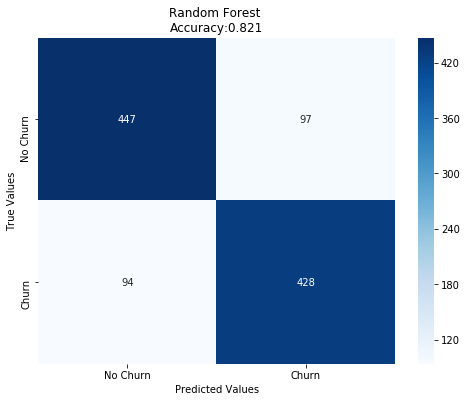

In [65]:
cm = confusion_matrix(Y_test, predictions_rf) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test, predictions_rf)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# Section 6: Support Vector Machines

## Standardization before implementing SVM's

In [56]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 


scaler = preprocessing.StandardScaler()

X_scaled=scaler.fit_transform(X[imp_features])
X_scaled = pd.DataFrame(X_scaled, columns=['Avg_Days_Delinquent', 'Percent_Increase_MOM',
       'Complaint_Code_Call Quality', 'Avg_Calls', 'Avg_Calls_Weekdays',
       'Complaint_Code_Moving', 'Current_Bill_Amt', 'Account_Age'])

C:\Users\Vikrant Arora\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vikrant Arora\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [57]:
X_scaled.describe().round(2)
#mean=0 and std=1, all fine

Avg_Days_Delinquent  Percent_Increase_MOM  Complaint_Code_Call Quality  \
count              4264.00               4264.00                      4264.00   
mean                  0.00                  0.00                        -0.00   
std                   1.00                  1.00                         1.00   
min                  -1.29                 -0.22                        -0.54   
25%                  -0.74                 -0.12                        -0.54   
50%                  -0.14                 -0.04                        -0.54   
75%                   0.50                  0.02                        -0.54   
max                  10.29                 44.68                         1.86   

       Avg_Calls  Avg_Calls_Weekdays  Complaint_Code_Moving  Current_Bill_Amt  \
count    4264.00             4264.00                4264.00           4264.00   
mean        0.00               -0.00                   0.00             -0.00   
std         1.00                1.00                   1.00              1.00   
min        -0.89               -0.97                  -0.35             -1.19   
25%        -0.64               -0.64                  -0.35             -0.44   
50%        -0.28               -0.29                  -0.35             -0.27   
75%         0.29                0.31                  -0.35              0.18   
max        16.28                8.41                   2.85             17.55   

       Account_Age  
count      4264.00  
mean          0.00  
std           1.00  
min          -1.58  
25%          -0.89  
50%          -0.05  
75%           0.79  
max           1.91

In [58]:
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=123,stratify=Y)

# Implementing SVM

In [70]:
from sklearn import svm

In [71]:
clf_svm=svm.SVC(kernel='rbf',random_state=0, gamma=1.0,C=1.0)
clf_svm.fit(X_train_scaled, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
clf_svm.score(X_test_scaled,Y_test)

0.776735459662289

In [73]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1,0.2,0.5,0.7, 1,2,5,10]
    gammas = [0.001, 0.01, 0.1,0.2,0.5,0.7, 1,2,5,10,20,30,40,50,100]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [74]:
svc_param_selection(X=X_train_scaled,y=Y_train,nfolds=5)

{'C': 10, 'gamma': 0.1}

In [75]:
clf_svm=svm.SVC(kernel='rbf',random_state=0, gamma=0.1,C=10)
clf_svm.fit(X_train_scaled, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
clf_svm.score(X_test_scaled,Y_test)
#much lower score than RF

0.7889305816135085

In [78]:
predictions_svm=clf_svm.predict(X_test_scaled)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics

target_names = ['No Churn', 'Churn']
print(classification_report(Y_test, predictions_svm, target_names=target_names))

#SVM has 4% lower recall for Churn than RF

              precision    recall  f1-score   support

    No Churn       0.79      0.80      0.79       544
       Churn       0.79      0.78      0.78       522

   micro avg       0.79      0.79      0.79      1066
   macro avg       0.79      0.79      0.79      1066
weighted avg       0.79      0.79      0.79      1066



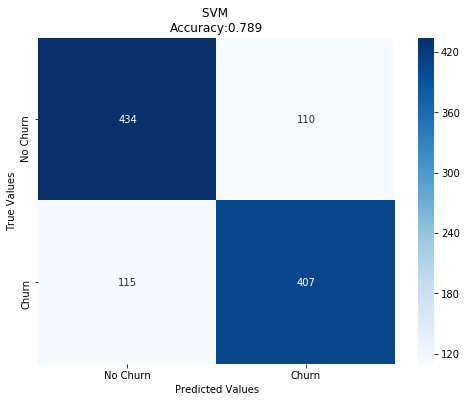

In [81]:
cm = confusion_matrix(Y_test, predictions_svm) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test, predictions_svm)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# Section 7: Implementing XGBoost

In [59]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [83]:
max_depth=list(range(3,16,1))
min_child_weight=list(range(0,8,1))

param_grid= {
              "max_depth": max_depth,
              "learning_rate":[0.01,0.02,0.03,0.05,0.1,0.3,0.5],
    "min_child_weight":min_child_weight,
              "subsample":[i/10.0 for i in range(5,10)],
 "colsample_bytree":[i/10.0 for i in range(6,10)],
    "gamma":[i/10.0 for i in range(0,5)],
    "n_estimators":[50,100,150,200,300,500]
                
                    }

#"reg_alpha":[1e-5, 1e-2, 0.1, 1, 100] NOT NEEDED as we dont have high dimensonlity

In [84]:
param_grid

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5],
 'min_child_weight': [0, 1, 2, 3, 4, 5, 6, 7],
 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
 'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'n_estimators': [50, 100, 150, 200, 300, 500]}

In [85]:
clf_xgb=XGBClassifier(objective='binary:logistic')

In [91]:
random_search_xgb=RandomizedSearchCV(estimator = clf_xgb, param_distributions=param_grid, cv = 5, verbose = 2,scoring='roc_auc',n_iter=5000)
random_search_xgb.fit(X_train[imp_features],Y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=6, le

[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=15,

[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=8, learning

[CV]  subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_dep

[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_dep

[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=5, learning

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=7, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=9, l

[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=4

[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=15, le

[CV]  subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=3, learning_

[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=3, lear

[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=7, learning_

[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_dep

[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=5, le

[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=13, learning

[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, lear

[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=10, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth

[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=3, l

[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=13, learnin

[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, 

[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_dep

[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=8, l

[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=11, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=6, learnin

[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=50, min_child_weight=7, max_dept

[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3

[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=4, learning

[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   4.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=15

[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=6, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   2.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   2.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   2.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   2.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_dep

[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, lear

[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=3, l

[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=11

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth

[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   2.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=6, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, 

[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=10, learning

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=5, learning

[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=9, le

[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=8, learning

[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=3, learn

[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_dep

[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=4, l

[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=9, l

[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=6, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=10, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=1, max_dep

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=6, lear

[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=9, learning_

[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_dep

[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, l

[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=11, 

[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   2.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, lea

[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=13, l

[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learnin

[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=11, 

[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=1

[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=7, l

[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=3, lea

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=15, 

[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=7, l

[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=1

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, l

[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=12

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=5, 

[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=5, learning

[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   2.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   2.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10,

[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=10, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=13

[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=13, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=11, learnin

[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, lear

[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, l

[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, lea

[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, 

[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, 

[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=15, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_dep

[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=2, max_depth

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=4, l

[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=15, 

[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=8, l

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_dep

[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=11, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   2.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_dept

[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=9, l

[CV]  subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=8, l

[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=15, 

[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=13, lea

[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_dept

[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=6, le

[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=10, lea

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, l

[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=11, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=11, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=11

[CV]  subsample=0.7, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=8, learning

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_dep

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=6, learnin

[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=7, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=13

[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=12, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=14, 

[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=6

[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=4, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=12, 

[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   2.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   3.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   2.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   2.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12,

[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=13, learning

[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=

[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=10, 

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=9, learning

[CV]  subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   2.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   2.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   2.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=10, learnin

[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   2.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   2.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=11, 

[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=11, learnin

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_dep

[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=6, l

[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learni

[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=11, learning

[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, l

[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   3.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   3.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=

[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   2.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_dep

[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=13, le

[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, 

[CV]  subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, lea

[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, learning_

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_dep

[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learnin

[CV]  subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=14, learnin

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=14, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_dep

[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, le

[CV]  subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=3, lear

[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=8, l

[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, lea

[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=10, learnin

[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   3.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   3.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=8

[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_dep

[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=3

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=7, le

[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=11, 

[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15,

[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=6, l

[CV]  subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=15, lea

[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=11, 

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=6

[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, 

[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_dep

[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   2.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   1.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=

[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.

[CV]  subsample=0.7, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=

[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, l

[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=10, 

[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   2.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   2.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth

[CV]  subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, learning

[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=7

[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning

[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=6, l

[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=4, l

[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=8, le

[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=4, le

[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning

[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=11, 

[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=14, 

[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   2.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_dept

[CV]  subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=11,

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=4, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=15, 

[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learnin

[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=

[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, lea

[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=4, l

[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=6, lear

[CV]  subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=5, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=100, min_child_weight=1, max_dep

[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=10, 

[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=9, learnin

[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=8, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=11

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=7, learnin

[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=11, learnin

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   3.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=10, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   3.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=3

[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=14, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=7, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=14, learning

[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=7, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   2.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   2.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=1

[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=5, learning

[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=6, max_depth=5, lear

[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, l

[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=4, l

[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, l

[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, 

[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_dep

[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_dept

[CV]  subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=7, l

[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=6, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   4.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, lea

[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=8, 

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=15, 

[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=3, learn

[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=8, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   3.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   3.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   3.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=4, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, le

[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=15, learnin

[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, lear

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=9, l

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=14

[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_dept

[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=7, l

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning

[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=5, learning

[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   3.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_dep

[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=4, l

[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=13, 

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth

[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, 

[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=9, l

[CV]  subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=3, l

[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   2.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=10, 

[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning

[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=5, l

[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_dep

[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=9, learning

[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=15, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_dep

[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=3, learning

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=7, learning

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_dep

[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=3, learning_

[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_dep

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth

[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, 

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_

[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=11, 

[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=4, l

[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, lea

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=15, 

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_dep

[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=9, l

[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=5, learning_rate=0

[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=1

[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_dep

[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=10, learning

[CV]  subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=3, learnin

[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=14, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   3.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   3.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=13,

[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning

[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13

[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=14, learni

[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_dep

[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   2.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=3, l

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_dep

[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=5, learni

[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=9, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=

[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_dept

[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=1

[CV]  subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=11, learning

[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=14,

[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=13, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, lea

[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=6, learni

[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   1.9s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_dep

[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   3.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_dep

[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=8, learning

[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, 

[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_

[CV]  subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=11, 

[CV]  subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   2.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   2.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=9, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_dep

[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   2.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=11

[CV]  subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learni

[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=100, min_child_weight=5, max_dep

[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   4.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   4.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   4.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   4.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_dep

[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth

[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=14, 

[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=8, learni

[CV]  subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_dep

[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, 

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=12, 

[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, l

[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=12, learni

[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=8, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=8, learnin

[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learning_

[CV]  subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=7

[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_dep

[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=13, 

[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, 

[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_dep

[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=6, l

[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=6, learning

[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   2.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   2.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=3

[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, 

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=10, learnin

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13,

[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, l

[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=5, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   4.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   4.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   4.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=11, 

[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=14, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=14, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=14, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=14, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=14, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=14, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=14, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=12, l

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=9, l

[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, l

[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_ra

[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=8, learni

[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=10, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=10, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=10, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=10, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=10, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth

[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13,

[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=12, learnin

[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=8, le

[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_dep

[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, 

[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=8, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=9, l

[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=6, learning

[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_dep

[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=3, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   3.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, lea

[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=4, learning

[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_dept

[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=3, learn

[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, 

[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   2.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   2.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=7, l

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_dept

[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=14, 

[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, lear

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   3.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   2.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   2.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_dep

[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=6, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, le

[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=0, max_depth=13, learnin

[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   2.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=7, learn

[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_dep

[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=4, learni

[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=12, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=6, learni

[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=6, learning_

[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=12,

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=4, l

[CV]  subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=13, lea

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=4, learning

[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=12, 

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=8, l

[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_dep

[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   2.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   3.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   2.4s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=14, l

[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=12, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   2.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_dep

[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=7, l

[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=4, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=2, max_depth=4, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=2, max_depth

[CV]  subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=4, learning

[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=12, 

[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   2.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=11, l

[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=2, max_dep

[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=3, l

[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=4, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=6, learning

[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=0, max_depth=11, 

[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   2.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   2.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=15, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=

[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, l

[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_dep

[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   1.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, le

[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_dep

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=11

[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=8, le

[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=14, learning

[CV]  subsample=0.8, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=7, 

[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=7, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   4.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   4.7s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=3, l

[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=6, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=14, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=14, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=14, 

[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=6, learning_

[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_dep

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=7, l

[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_dep

[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=3

[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=9, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=0, max_depth=11, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=13,

[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   1.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_dep

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth

[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=9, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=9, learning_

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=4, learning

[CV]  subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   2.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   2.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_dep

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=4, l

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=1, max_depth=4, learni

[CV]  subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=5, le

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_dep

[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learn

[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=8, l

[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth

[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=5, learning

[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=4, learning

[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   2.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   2.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=9, learn

[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=10, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=9, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=3, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=12, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=12,

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=6, max_dept

[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=14, lea

[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_dep

[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   3.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=13, lea

[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=3, max_depth=9, learning

[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=11

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=2, max_depth=10, l

[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=0, max_depth=8, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   2.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=5, learning

[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_dep

[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   2.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   3.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   2.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth

[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   2.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   2.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth

[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.9, n_estimators=50, min_child_weight=5, max_depth=4, le

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_dep

[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=15, 

[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.05, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth

[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=11, 

[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=9, learnin

[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=4, l

[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=4, learning

[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=15, 

[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=7, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_dep

[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, 

[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=13, learnin

[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=11, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=

[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=8, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   2.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   2.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=12, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   2.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=7, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=7

[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.5, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_dept

[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=11, learning_rate=0

[CV]  subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=7, l

[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=14

[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_dep

[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_dep

[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=9, learning_rate

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=8, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=6, max_depth=7, lear

[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=4, learning

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=7, l

[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=3, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=4, lear

[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_dep

[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=6, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=7, le

[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=6, learning

[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_dep

[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=12, lea

[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=7, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=4, max_dept

[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=13, learning

[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=10, 

[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=15, 

[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=15, 

[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, lea

[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   2.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   2.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=3, learning_

[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate

[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_

[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learni

[CV]  subsample=0.9, n_estimators=200, min_child_weight=7, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=8, le

[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_dep

[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=6, learning

[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_dep

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=7, lea

[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=8, l

[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=1, max_depth=13, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   3.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   3.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, 

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=5, learning

[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=5, l

[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, 

[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_dep

[CV]  subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=10, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=10,

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning

[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=13

[CV]  subsample=0.8, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   1.9s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   1.9s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=7, learni

[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=9, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=5, max_depth=6, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   3.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   3.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   3.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=7, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   3.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=7, max_dep

[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=14, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=14, 

[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   2.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   2.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth

[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   2.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   3.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   3.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   2.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=5, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=1

[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=8, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=15, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=13, 

[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, l

[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_depth=1

[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=6, learning_rate=0.

[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=11

[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   2.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=6, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=4, l

[CV]  subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=13

[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=6, max_depth=4, learning

[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   3.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   3.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   3.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   3.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=3, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=8, learning_r

[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=4, max_depth=8, learning

[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   2.0s
[CV] subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   2.0s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_dep

[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth

[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=200, min_child_weight=1, max_dept

[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=14, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=9, lear

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=3, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning

[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=10, l

[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=11, 

[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_dep

[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=7, learning

[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=12, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   1.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=15

[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   2.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=5, 

[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=6, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=7, learning

[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, l

[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=4, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=10, 

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=12, learning_rate=0.3, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=1, max_depth=4, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=8, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   2.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learnin

[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=9, learning_

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   1.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   1.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=14, 

[CV]  subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=9, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=8, learning

[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=12, 

[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_dep

[CV]  subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=10, learni

[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_dep

[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=4, max_depth=8

[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=5, max_depth=3, learning

[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=5, learning

[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learnin

[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=8, l

[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=14, lea

[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, learning

[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   2.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=14, 

[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=0, max_depth=6, learnin

[CV]  subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=4, learning

[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=4, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=4, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=4, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=14, lea

[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_dep

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=13, learn

[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=9, le

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=15, learning

[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.03, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, lea

[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_dep

[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=7, max_depth=14, lea

[CV]  subsample=0.8, n_estimators=500, min_child_weight=2, max_depth=6, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=15, l

[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=0, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=12, 

[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=12, learning

[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=9, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   2.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=6,

[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=6, learning_

[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_dep

[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   2.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   2.5s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=8, l

[CV]  subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=7, max_depth=6, l

[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=15, lea

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, le

[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=15, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_dept

[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=4, learning_rate=0.02, gamma=0.4, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=14, 

[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=13, 

[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=12, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=12, 

[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=9, learning

[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=2, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=9, l

[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=7, learning_

[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=10, learning

[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.5, gamma=0.2, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   2.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=10, lea

[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=7, l

[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=3, le

[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.4, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=3, learning_rat

[CV]  subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=6, learning_rate=0.

[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=2, max_depth=12, learning_rate=0.5, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=12

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=12, 

[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=1, max_dep

[CV]  subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.9, n_estimators=150, min_child_weight=5, max_depth=

[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=12, 

[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   1.9s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=15

[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=6, learnin

[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   3.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   2.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   3.0s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   3.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_dep

[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=14, 

[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=8, l

[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=4

[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate=0.3, gamma=0.4, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=6, learning_rate

[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=11, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=11, learning_rate=0.01, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, le

[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.

[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=14, lea

[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=14, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=15, 

[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=4, max_depth=10, learnin

[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=4, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=

[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=7, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=7,

[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, l

[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=0, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_dep

[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=0, max_depth=14, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=8, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=8, learni

[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=12, 

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=4, learnin

[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=6, l

[CV]  subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=2, max_depth=6, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=12, 

[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=9, learning_

[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=5, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=5, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning

[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=6, learning

[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=3, lear

[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_dep

[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=4, l

[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=12, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=12, learning

[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=5, max_depth=8, learning

[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=4, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   3.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=11, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_dep

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=3, learning

[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=11, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   2.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=11, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=11, learning_rate=0.3, gamma=0.4, colsample_bytree=0.8, total=   2.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=12, 

[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=14, 

[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=4, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=4, l

[CV]  subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=9, learning

[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=8, learning

[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=0, max_depth=3, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=0, max_depth=8, l

[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_dep

[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=14, learning_rate=0.3, gamma=0.2, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=9, learni

[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=5, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=13, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=3, max_depth=13, l

[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.9, n_estimators=300, min_child_weight=5, max_depth=9, learning

[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=9, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=10,

[CV]  subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning_rate=0.3, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=2, max_depth=4, learning

[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=8, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   1.9s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=8, lea

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=3, learnin

[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=50, min_child_weight=1, max_depth=8, le

[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=7, learn

[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=1, max_depth=10, 

[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=0, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=0, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=0, max_depth=10

[CV]  subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=2, max_depth=13,

[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=14, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=14, 

[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=4, max_depth=15, l

[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=6, max_depth=11, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=1, max_depth=7, l

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=4, max_depth=7, learn

[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=3, learning

[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=4, lea

[CV]  subsample=0.6, n_estimators=300, min_child_weight=2, max_depth=6, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=9, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=9, l

[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   2.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=6, max_depth=14, 

[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   3.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   3.2s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=

[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.9, n_estimators=200, min_child_weight=0, max_depth=5, learning

[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=11, learning_rate=0.02, gamma=0.0, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=11

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   3.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   3.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=3, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   3.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=3, max_dep

[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=15, learnin

[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=4, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=5, lear

[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning

[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth

[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=11, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_dep

[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   4.3s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   4.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=0, max_depth=14, learning_rate=0.03, gamma=0.0, colsample_bytree=0.8, total=   4.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=4, max_depth=15, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.7, n_estimators=150, min_child_weight=4, max_dep

[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=4, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=7, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=7, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=3, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=100, min_child_weight=6, max_depth=14, learnin

[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=11, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.4, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=9, l

[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=4, learning

[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=11, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=9, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=9, learning

[CV]  subsample=0.9, n_estimators=50, min_child_weight=6, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.5, gamma=0.3, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=0, max_depth=10, 

[CV]  subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=10, 

[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=8, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=8, le

[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=8, learning

[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=6, max_depth=5, learning_rate=0.3, gamma=0.2, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=0, max_depth=7, learning

[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.3, gamma=0.0, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=4, learnin

[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=2, max_depth=15, learning_rate=0.01, gamma=0.0, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_dep

[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=9, l

[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=12, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_dep

[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=12, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_depth=14

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=15, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_weight=2, max_dept

[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.9, n_estimators=150, min_child_weight=4, max_depth=6, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=5, learning

[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_dep

[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_dep

[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=5, max_depth=7, learning_rate=0.3, gamma=0.1, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning

[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=15, l

[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=12, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=12, 

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=3, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=1, max_depth=15, learnin

[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=150, min_child_weight=3, max_depth=8, learning

[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=11, learning_rate=0.02, gamma=0.3, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.2, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=1, max_depth=5, le

[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=150, min_child_weight=2, max_depth=7, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=1, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=4, max_depth=14

[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=11, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total=   1.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, learning_rate=0.01, gamma=0.2, colsample_bytree=0.9, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=7, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=10, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_dep

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.03, gamma=0.4, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=

[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=8, l

[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   1.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13, learning_rate=0.01, gamma=0.3, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=4, max_depth=13

[CV]  subsample=0.5, n_estimators=500, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   2.9s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=3, learning_rate

[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=13, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.6, n_estimators=50, min_child_weight=3, max_depth=12, l

[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=10, 

[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.5, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=6, max_depth=7, learning_rate=0.

[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.01, gamma=0.0, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.8, n_estimators=150, min_child_weight=3, max_depth

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=4, max_depth=6, 

[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=5, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.3s
[CV] subsample=0.9, n_estimators=500, min_child_weight=0, max_depth=10, 

[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   2.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=2, max_depth=11, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=9

[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=7, max_depth=4, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=7, learning

[CV]  subsample=0.9, n_estimators=500, min_child_weight=1, max_depth=7, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   2.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=11, learning_rate=0.03, gamma=0.3, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=3, max_depth

[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=8, l

[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=7, max_depth=12, learn

[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=15, 

[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   3.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   3.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=2, max_depth=13, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8, total=   3.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=11, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=5, max_depth=

[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=6, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.02, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=7, max_depth=7, l

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   2.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=9, l

[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=7, max_depth=14, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=11, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=1

[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, learning

[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=10, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   1.0s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=0, max_depth=12, learning_rate=0.1, gamma=0.3, colsample_bytree=0.6, total=   1.1s
[CV] subsample=0.5, n_estimators=200, min_child_weight=0, max_depth

[CV]  subsample=0.9, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6, total=   2.5s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=7, learning_rate=0.05, gamma=0.2, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=7, learnin

[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=6, learning_rate=0.5, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=3, max_depth=15, learnin

[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.6s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=6, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   3.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=13, learning_rate=0.05, gamma=0.3, colsample_bytree=0.9, total=   2.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=

[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=3, max_depth=5, learning

[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=1, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=500, min_child_weight=0, max_depth=3, learni

[CV]  subsample=0.6, n_estimators=300, min_child_weight=0, max_depth=5, learning_rate=0.5, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.8, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=5, max_depth=9, learning

[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_dep

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   2.8s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.0s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_depth=3, learnin

[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=8, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=7, max_depth=3, learning_rate=0.5, gamma=0.0, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.0, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=6, learning

[CV]  subsample=0.9, n_estimators=150, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.1, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=8, le

[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.3, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=3, max_dep

[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=4, max_depth=11, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=7, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=0, max_depth=7, learning_r

[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=4, max_depth=3, l

[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.5, n_estimators=50, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=7, max_depth=15, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=7, max_depth=15, learnin

[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=4, max_dep

[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=11, learning_rate=0.05, gamma=0.3, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.9, n_estimators=200, min_child_weight=4, max_depth=11, learning

[CV]  subsample=0.7, n_estimators=200, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.0, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.5, gamma=0.3, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=6, learnin

[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=6, max_depth=4, learning_rate=0.3, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=2, max_depth=9, learning

[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=2, max_depth=14, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=150, min_child_weight=5, max_depth=13, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.7, n_estimators=150, min_child_weight=5, max_dep

[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=6, max_depth=4, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=0, max_depth=11, learning_rate=0.02, gamma=0.0, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.9, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=2, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=2, max_depth=6, l

[CV]  subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.2, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=3, learning_rate=0.5, gamma=0.1, colsample_bytree=0.9, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=6, max_depth=3, learnin

[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=13, 

[CV]  subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=6, max_depth=5, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.8, n_estimators=300, min_child_weight=1, max_depth=14,

[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, learning_rate=0.1, gamma=0.1, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=10, 

[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.4s
[CV] subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=200, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, total=   1.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   1.7s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_dep

[CV]  subsample=0.8, n_estimators=50, min_child_weight=0, max_depth=9, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=7, learning_rate=0.05, gamma=0.4, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=7, le

[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=14, learning_rate=0.02, gamma=0.1, colsample_bytree=0.8, total=   2.2s
[CV] subsample=0.5, n_estimators=200, min_child_weight=2, max_dep

[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   1.4s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=15, learning_rate=0.5, gamma=0.4, colsample_bytree=0.7, total=   0.8s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=1

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=13, learning_rate=0.01, gamma=0.4, colsample_bytree=0.9, total=   1.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_dep

[CV]  subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=15, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, total=   0.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=11, learning_rate=0.02, gamma=0.2, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=1, max_depth=11, lea

[CV]  subsample=0.8, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.9, total=   1.3s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=500, min_child_weight=5, max_depth=4, le

[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   1.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=2, max_dept

[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=3, max_depth=10, learning_rate=0.3, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=13, learning_rate=0.3, gamma=0.3, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=13, 

[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   1.6s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=6, learning

[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=4, lear

[CV]  subsample=0.9, n_estimators=100, min_child_weight=2, max_depth=6, learning_rate=0.5, gamma=0.1, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=0, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=0, max_depth

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=4, max_depth=6, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=3, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, learning_rate=0.01, gamma=0.3, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, l

[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=3, l

[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=3, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=5, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=   1.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=5, max_depth=5, lea

[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=7, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   2.1s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   2.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   2.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=2, max_depth=9, l

[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=10, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=300, min_child_weight=0, max_depth=12, 

[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=1, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=1, max_dep

[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.3, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning

[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.3, colsample_bytree=0.8, total=   0.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, l

[CV]  subsample=0.8, n_estimators=200, min_child_weight=3, max_depth=9, learning_rate=0.1, gamma=0.0, colsample_bytree=0.9, total=   1.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=13, learning_rate=0.3, gamma=0.0, colsample_bytree=0.8, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=6, max_depth=13, l

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_dep

[CV]  subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=5, learning_rate=0.02, gamma=0.4, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=2, max_depth=5, l

[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, learning_rate=0.05, gamma=0.4, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=0, max_depth=4, l

[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=7, max_depth=9, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=15, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=15, learning

[CV]  subsample=0.5, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.05, gamma=0.4, colsample_bytree=0.7, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=5, lea

[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=7, max_depth=8, learning_rate=0.05, gamma=0.3, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.9, n_estimators=300, min_child_weight=3, max_depth=10, 

[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=7, max_depth=5, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.2, colsample_bytree=0.9, total=   1.5s
[CV] subsample=0.9, n_estimators=300, min_child_weight=7, max_depth=8, lear

[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.05, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=3, max_dep

[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=9, learning_rate=0.02, gamma=0.2, colsample_bytree=0.9, total=   0.9s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=12, learning_rate=0.5, gamma=0.3, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=150, min_child_weight=0, max_depth=12, 

[CV]  subsample=0.6, n_estimators=300, min_child_weight=1, max_depth=14, learning_rate=0.05, gamma=0.0, colsample_bytree=0.8, total=   2.0s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_weight=3, max_dep

[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=2, max_depth=15, learning_rate=0.02, gamma=0.3, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.9, n_estimators=500, min_child_weight=4, max_dep

[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=4, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=7, learn

[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=1, max_depth=10, l

[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=200, min_child_weight=3, max_depth=12, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=150, min_child_weight=3, max_dep

[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   2.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=9, learning_rate=0.01, gamma=0.4, colsample_bytree=0.7, total=   2.1s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=10, learning_rate=0.1, gamma=0.0, colsample_bytree=0.6, total=   0.8s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=10, 

[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.7s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.9, total=   0.8s
[CV] subsample=0.5, n_estimators=300, min_child_weight=2, max_depth=4, learning

[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   0.7s
[CV] subsample=0.6, n_estimators=150, min_child_weight=5, max_depth=12, learning

[CV]  subsample=0.7, n_estimators=300, min_child_weight=7, max_depth=7, learning_rate=0.03, gamma=0.2, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   3.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   3.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.3, colsample_bytree=0.8, total=   3.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_dept

[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9 
[CV]  subsample=0.5, n_estimators=50, min_child_weight=2, max_depth=13, learning_rate=0.5, gamma=0.0, colsample_bytree=0.9, total=   0.2s
[CV] subsample=0.5, n_estimators=500, min_child_weight=1, max_depth=5, learning

[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=300, min_child_weight=5, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.7, total=   1.1s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   1.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=12, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7, total=   0.9s
[CV] subsample=0.6, n_estimators=200, min_child_weight=4, max_depth=

[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   3.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   3.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   3.2s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=4, max_depth=12, learning_rate=0.02, gamma=0.0, colsample_bytree=0.8, total=   3.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=4, max_dep

[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=150, min_child_weight=4, max_depth=8, learning_rate=0.02, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=13, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=1, max_depth=13

[CV]  subsample=0.5, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.02, gamma=0.2, colsample_bytree=0.7, total=   2.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.03, gamma=0.1, colsample_bytree=0.6, total=   1.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=7, max_depth=9, 

[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=2, max_depth=7, learning_rate=0.5, gamma=0.0, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.9, n_estimators=100, min_child_weight=4, max_depth=8, learning_rate=0

[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, gamma=0.1, colsample_bytree=0.8, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, learning_rate=0.05, gamma=0.1, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=2, max_depth=9, l

[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.7s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7 
[CV]  subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, learning_rate=0.03, gamma=0.0, colsample_bytree=0.7, total=   1.8s
[CV] subsample=0.5, n_estimators=500, min_child_weight=6, max_depth=8, l

[CV]  subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=50, min_child_weight=4, max_depth=14, learning_rate=0.1, gamma=0.2, colsample_bytree=0.6, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.02, gamma=0.3, colsample_bytree=0.6, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=0, max_depth=9, learni

[CV]  subsample=0.6, n_estimators=150, min_child_weight=7, max_depth=10, learning_rate=0.03, gamma=0.0, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=   0.1s
[CV] subsample=0.6, n_estimators=50, min_child_weight=4, max_depth=6, learnin

[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=6, max_depth=14, learning_rate=0.5, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.6, n_estimators=200, min_child_weight=7, max_depth=12, 

[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   2.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=1, max_depth=9, learning_rate=0.1, gamma=0.4, colsample_bytree=0.6, total=   2.0s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=4, learning_rate=0.02, gamma=0.1, colsample_bytree=0.9, total=   0.1s
[CV] subsample=0.9, n_estimators=50, min_child_weight=3, max_depth=4, learning_

[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8 
[CV]  subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, learning_rate=0.02, gamma=0.2, colsample_bytree=0.8, total=   0.2s
[CV] subsample=0.9, n_estimators=50, min_child_weight=7, max_depth=14, l

[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7 
[CV]  subsample=0.8, n_estimators=150, min_child_weight=4, max_depth=6, learning_rate=0.3, gamma=0.1, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.6, total=   1.8s
[CV] subsample=0.9, n_estimators=500, min_child_weight=5, max_depth=8, learning

[CV]  subsample=0.9, n_estimators=500, min_child_weight=3, max_depth=13, learning_rate=0.03, gamma=0.0, colsample_bytree=0.9, total=   3.9s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.6s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=9, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, total=   0.5s
[CV] subsample=0.9, n_estimators=100, min_child_weight=0, max_depth=9, learni

[Parallel(n_jobs=1)]: Done 25000 out of 25000 | elapsed: 599.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5000, n_jobs=None,
          param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5], 'min_child_weight': [0, 1, 2, 3, 4, 5, 6, 7], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'n_estimators': [50, 100, 150, 200, 300, 500]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scor

In [92]:
random_search_xgb.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.03,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

In [60]:
clf_xgb=XGBClassifier(objective='binary:logistic', subsample=0.9,n_estimators=200,min_child_weight=3,max_depth=3,
                     learning_rate=0.03,gamma=0.1,colsample_bytree=0.9)
clf_xgb.fit(X_train[imp_features],Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.1, learning_rate=0.03,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9)

In [61]:
clf_xgb.score(X_test[imp_features],Y_test)
#much lower score than RF

0.8151969981238274

In [62]:
predictions_xgb=clf_xgb.predict(X_test[imp_features])

In [63]:
target_names = ['No Churn', 'Churn']
print(classification_report(Y_test, predictions_xgb, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.81      0.83      0.82       544
       Churn       0.82      0.80      0.81       522

   micro avg       0.82      0.82      0.82      1066
   macro avg       0.82      0.81      0.82      1066
weighted avg       0.82      0.82      0.82      1066



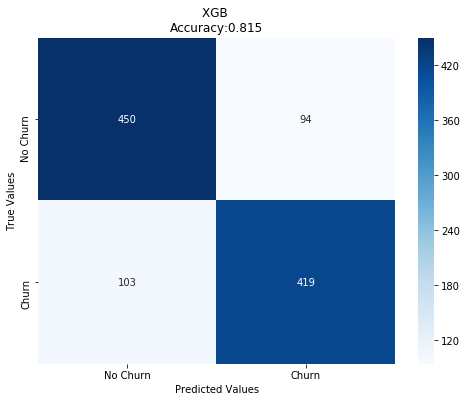

In [64]:
cm = confusion_matrix(Y_test, predictions_xgb) 

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'], 
                     columns = ['No Churn','Churn'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('XGB \nAccuracy:{0:.3f}'.format(accuracy_score(Y_test, predictions_xgb)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# Section 8: Evaluation of ML Models we have implemented

Random Forests and XGBoost give good results and SVM is underperforming, so lets plot ROC curve for RF & XGB

In [65]:
from sklearn.metrics import roc_curve,auc

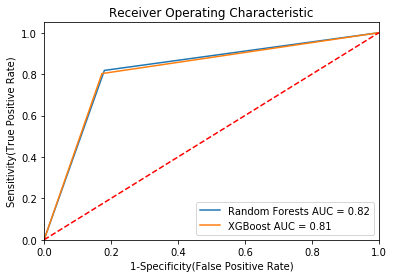

In [67]:
models = [
{
    'label': 'Random Forests',
    'model': clf_rf,
},
{
    'label': 'XGBoost',
    'model': clf_xgb,
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train[imp_features], Y_train)
    y_pred=model.predict(X_test[imp_features])
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], roc_auc))
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

We can select either of the two but since RF are less prone to overfitting I will go ahead with it
(Reference: https://www.quora.com/When-would-one-use-Random-Forests-over-Gradient-Boosted-Machines-GBMs)